# Plotting ERA5 Data  (DEV)

These notebook are used for develoopmentof new versionsof Zapata



In [1]:
import os
import sys
import math

import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt 
import scipy.linalg as sc
import numpy.linalg as lin
from scipy import stats
import xarray as xr
import pandas as pd
import cartopy.crs as car
import cmaps as cmaps

homedir = os.path.expanduser("~")
#Working Directory
wkdir =  '/Dropbox (CMCC)/ERA5'
dddir =  '/Dropbox (CMCC)/ERA5_DATA'
sys.path.insert(1, homedir + '/Dropbox (CMCC)/ZapataLibrary/Zapata')

os.chdir(homedir + wkdir)
import cftime

import zapata.data as zdat
import zapata.mapping as zmap
import zapata.computation as zcom
import zapata.lib as lib
import zapata.colormap as zcol
# from geocat.viz import cmaps as gvcmaps
# from geocat.viz import util as gvutil

%load_ext autoreload
%autoreload 2
%matplotlib inline

## read a single Xarray using read_xarray

In [2]:
%%javascript
document.title='DEV'

<IPython.core.display.Javascript object>

In [3]:
BYR = cmaps.BlueYellowRed

## Read DataSetdirectly using read_datasets

In [4]:
var='z'
level='200'
period='DJF'
epoch='ALL'
dd=zdat.in_data('z',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=True)

Using cache ..

Directory  /Users/antonionavarra/Dropbox (CMCC)/ERA5_DATA/DATA_CACHE  Already Exists
Creating file /Users/antonionavarra/Dropbox (CMCC)/ERA5_DATA/DATA_CACHE/z_200_ALL_DJF_True.nc
Selected data from 1950-01-01T00:00:00.000000000 to 2019-12-01T00:00:00.000000000 



In [17]:
# average
Zmean = dd.z.mean(dim='time')/10.
Zeddy=Zmean - Zmean.mean(dim='lon')
# Smooth the 500-hPa geopotential height field
# Be sure to only smooth the 2D field, this is to check the error on add_ciclyc_lon
Zmean = Zmean.assign_coords({'lon':Zmean.lon - 180.})


<xarray.DataArray (lat: 721, lon: 1441)>
array([[10698.33007812, 10698.33007812, 10698.33007812, ...,
        10698.33007812, 10698.33007812, 10698.33007812],
       [10698.11132812, 10698.10839844, 10698.10742188, ...,
        10698.11328125, 10698.11132812, 10698.11132812],
       [10697.95996094, 10697.95800781, 10697.95703125, ...,
        10697.96484375, 10697.96484375, 10697.95996094],
       ...,
       [10925.9921875 , 10925.984375  , 10925.97851562, ...,
        10925.99902344, 10925.99511719, 10925.9921875 ],
       [10926.01367188, 10926.01171875, 10926.00878906, ...,
        10926.02148438, 10926.01855469, 10926.01367188],
       [10926.06640625, 10926.06640625, 10926.06640625, ...,
        10926.06640625, 10926.06640625, 10926.06640625]])
Coordinates:
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.5 179.8 180.0

 Opening figure , 2 rows and 1 cols 

Number of Contours  10
Number of Contours  15


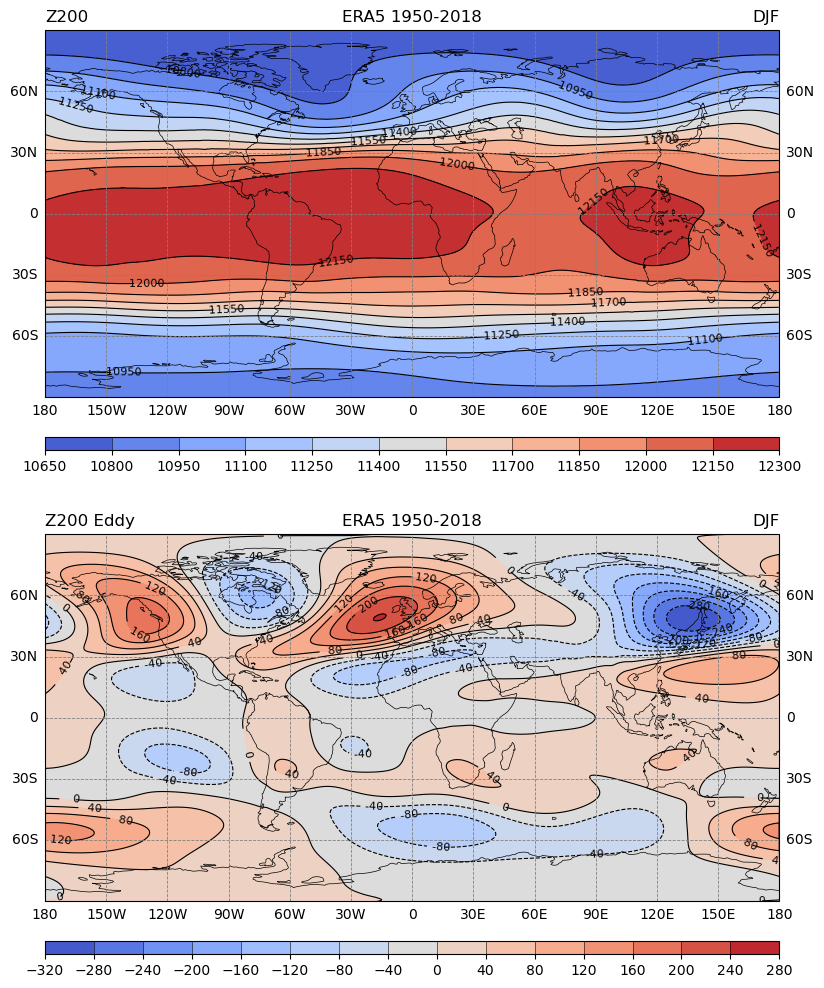

In [14]:
#Example Two Plots
bigtit = 'ERA5 1950-2018'
right=period
left1 = 'Z200'
left2 = 'Z200 Eddy'
satpro={'projection':'Satellite','centlon':60.,'centlat':40,'z':6e+6}
satpro = 'Atlantic'
fig,ax,pro=zmap.init_figure(2,1,satpro, constrained_layout=False, figsize=(24,12))
handle=zmap.xmap(Zmean, [10], pro, ax=ax[0],refline=None,contour=True,ylimit=None,\
                       cyclic=False,title={'maintitle':bigtit, 'lefttitle':left1,'righttitle':right},cmap='coolwarm',data_cent_lon=0)
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(zcom.smooth_xarray(Zeddy), [15], pro, ax=ax[1],refline=None, contour=True,ylimit=None,\
                        title={'maintitle':bigtit, 'lefttitle':left2,'righttitle':right},cmap='coolwarm',data_cent_lon=0)
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
zmap.changebox(ax,'all',linewidth=2,color='black')
zmap.changelabel(ax,fontsize=14,fontfamily='futura',fontweight='bold')
#fig.subplots_adjust(wspace=0,hspace=0.2)
# Add horizontal colorbar
plt.savefig('Z200.pdf')
plt.show()


 Opening figure , 2 rows and 1 cols 

 Plotting with x limits (-180.0, 179.751)  
 Plotting with y limits (20, 90)  
Number of Contours  15
 Plotting with x limits (-180.0, 179.751)  
 Plotting with y limits (20, 90)  
Number of Contours  15


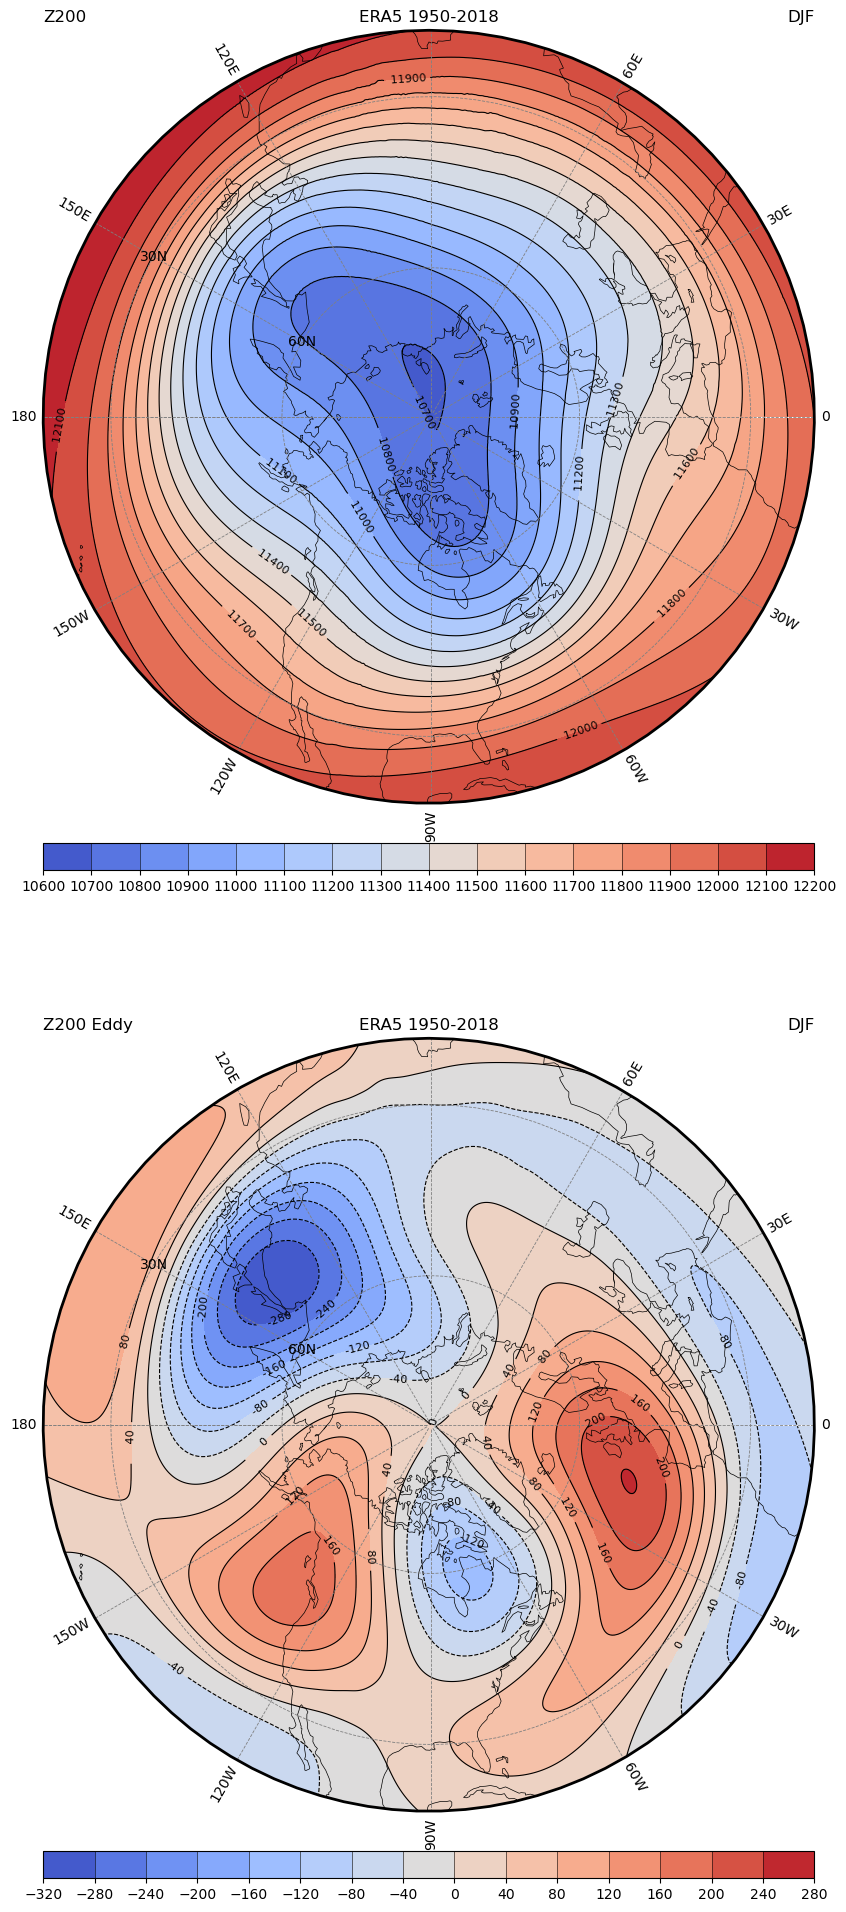

In [7]:
#Example Two Plots
bigtit = 'ERA5 1950-2018'
right=period
left1 = 'Z200'
left2 = 'Z200 Eddy'
# fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
fig,ax,pro=zmap.init_figure(2,1,'NHStereoAmerica', constrained_layout=False, figsize=(12,24))
handle=zmap.xmap(Zmean.sel(lat=slice(90,20)), [15], pro, ax=ax[0],refline=None,contour=True,ylimit=(20,90),\
                       title={'maintitle':bigtit, 'lefttitle':left1,'righttitle':right},cmap='coolwarm',data_cent_lon=0)
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(zcom.smooth_xarray(Zeddy), [15], pro, ax=ax[1],refline=None, contour=True,ylimit=(20,90),\
                        title={'maintitle':bigtit, 'lefttitle':left2,'righttitle':right},cmap='coolwarm',data_cent_lon=0)
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
zmap.changebox(ax,'all',linewidth=2,color='black')
zmap.changelabel(ax,fontsize=14,fontfamily='futura',fontweight='bold')
#fig.subplots_adjust(wspace=0,hspace=0.2)
# Add horizontal colorbar
plt.savefig('Z200NH.pdf')
plt.show()


 Opening figure , 2 rows and 1 cols 

 Projection in `xmap` Robinson
Number of Contours  15
 Projection in `xmap` Robinson
Number of Contours  15


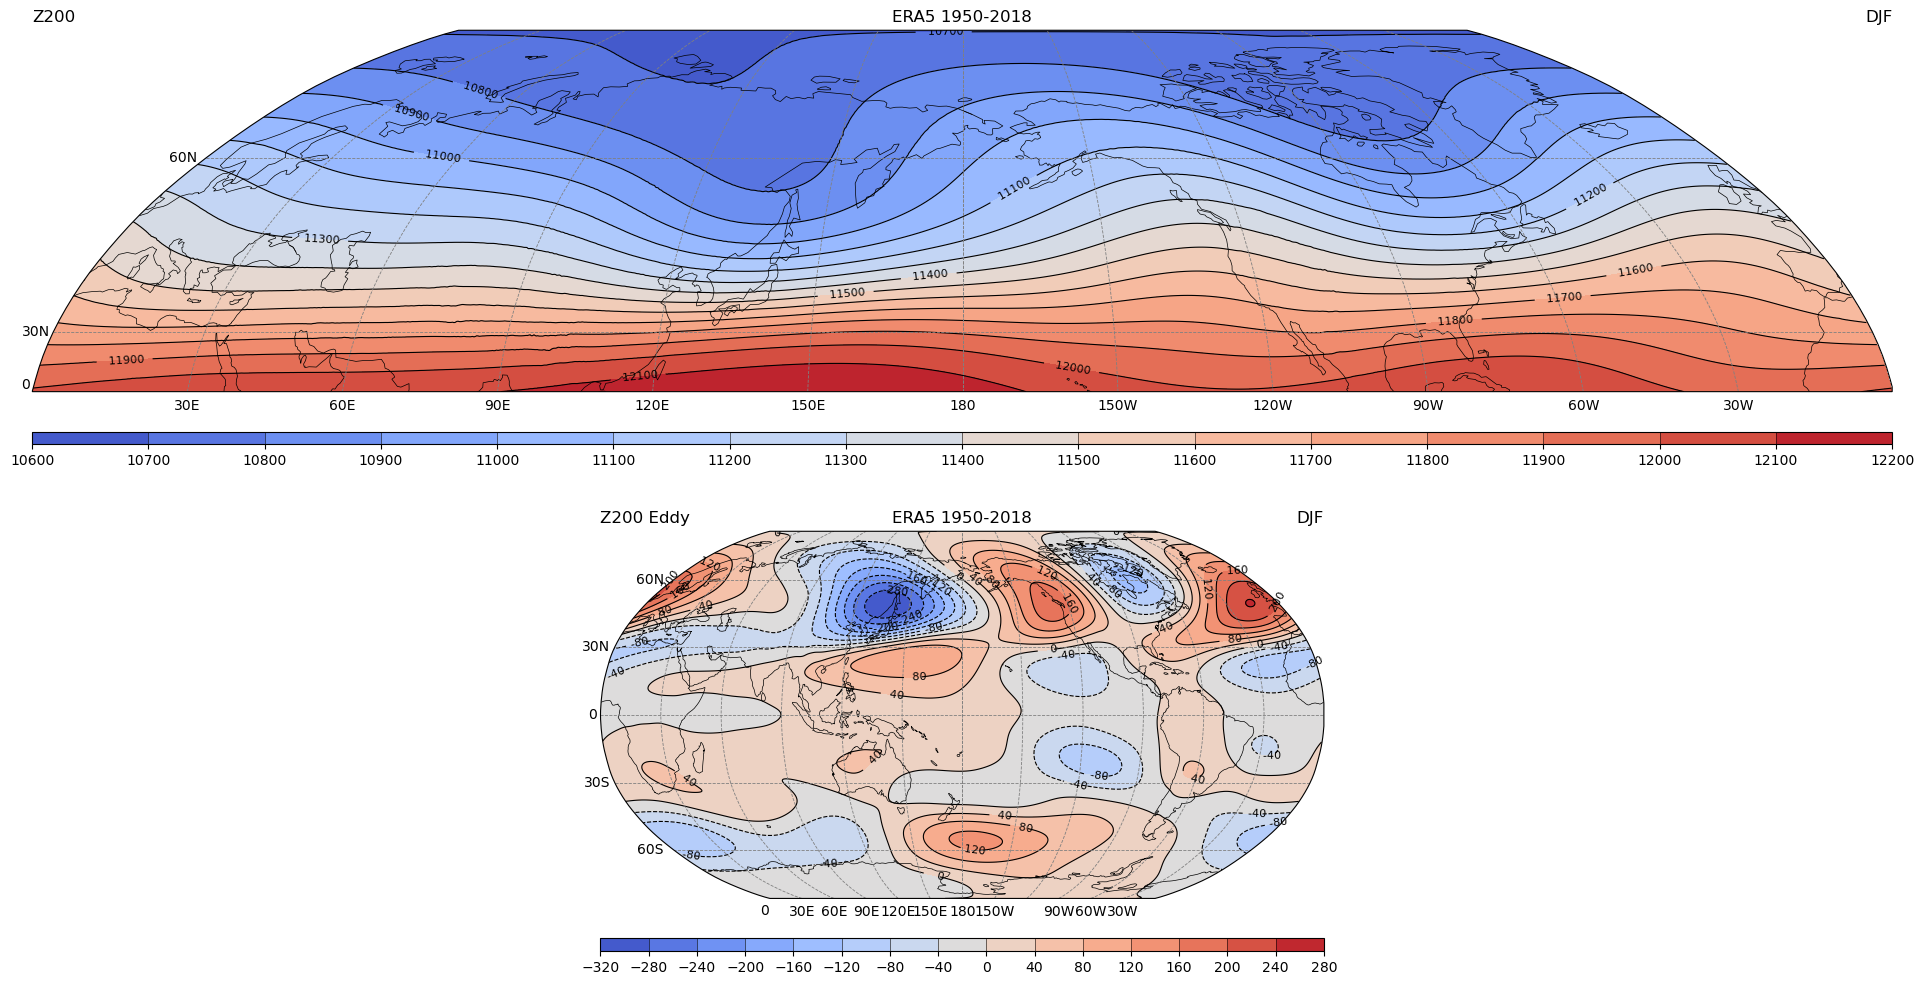

In [8]:
#Example Two Plots
bigtit = 'ERA5 1950-2018'
right=period
left1 = 'Z200'
left2 = 'Z200 Eddy'
# fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
fig,ax,pro=zmap.init_figure(2,1,'RobPacific', constrained_layout=False, figsize=(24,12))
handle=zmap.xmap(Zmean.sel(lat=slice(90,20)), [15], pro, ax=ax[0],refline=None,contour=True,ylimit=(20,90),\
                       title={'maintitle':bigtit, 'lefttitle':left1,'righttitle':right},cmap='coolwarm',data_cent_lon=0)
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(zcom.smooth_xarray(Zeddy), [15], pro, ax=ax[1],refline=None, contour=True,ylimit=(-90,90),\
                        title={'maintitle':bigtit, 'lefttitle':left2,'righttitle':right},cmap='coolwarm',data_cent_lon=0)
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
zmap.changebox(ax,'all',linewidth=2,color='black')
zmap.changelabel(ax,fontsize=14,fontfamily='futura',fontweight='bold')
#fig.subplots_adjust(wspace=0,hspace=0.2)
# Add horizontal colorbar
plt.savefig('Z200NH.pdf')
plt.show()


In [9]:
#Plot Zonal Wind
var='u'
level='200'


UW = zdat.read_era5(var,level,period='DJF',epoch=epoch,loc = homedir + dddir)
US = zdat.read_era5(var,level,period='JJA',epoch=epoch,loc = homedir + dddir)
UWmean = UW[var].mean(dim='time')
USmean = US[var].mean(dim='time')

 Opening figure , 2 rows and 1 cols 

Setting Fixed Contours
 Contouring from  -10   to 70  with interval   10
Setting Fixed Contours
 Contouring from  -10   to 70  with interval   10


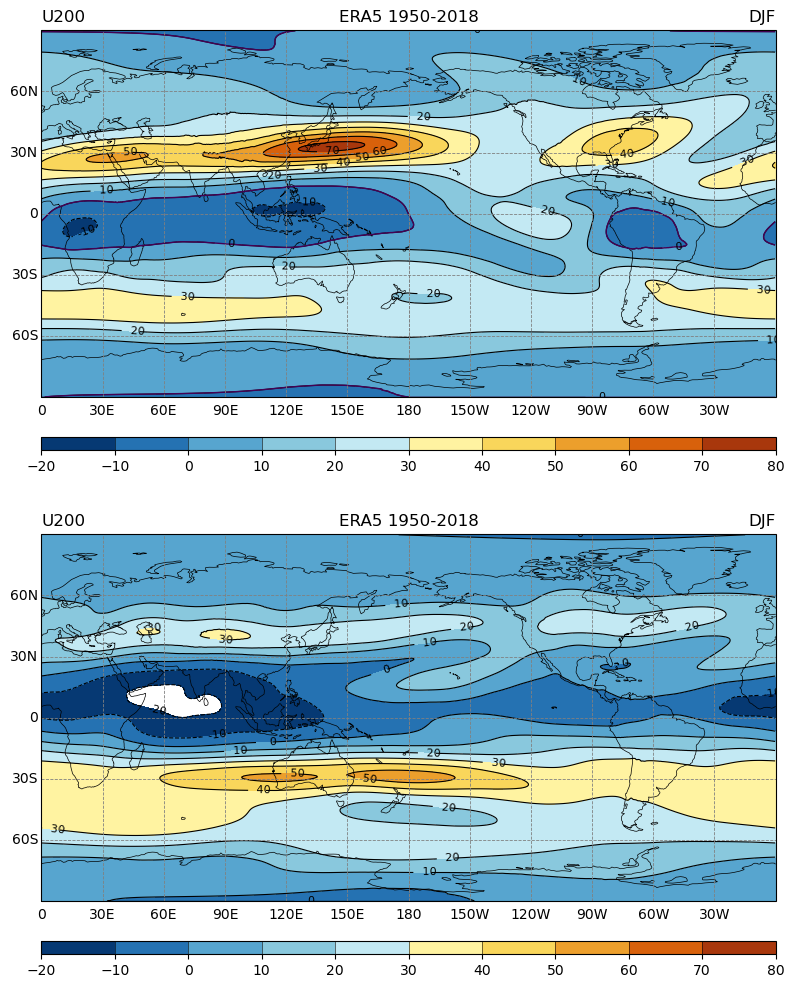

In [10]:
bigtit = 'ERA5 1950-2018'
right1='DJF'
right2='JJA'
left1 = 'U200'
color_map=BYR
cont1 = [ -10, 70, 10]
cont2=cont1
fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
handle=zmap.xmap(UWmean, cont1, pro, ax=ax[0], refline=0,\
                       title={'maintitle':bigtit, 'lefttitle':left1,'righttitle':right},cmap=color_map,data_cent_lon=0)
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(USmean, cont2, pro, ax=ax[1],refline=None,\
                        title={'maintitle':bigtit, 'lefttitle':left1,'righttitle':right},cmap=color_map,data_cent_lon=0)
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
fig.subplots_adjust(wspace=0,hspace=0.2)
zmap.changebox(ax,'all',linewidth=2,color='black')
zmap.changelabel(ax,fontsize=14,fontfamily='futura',fontweight='bold')
# Add horizontal colorbar
plt.savefig('U200.pdf')
plt.show()

In [11]:
#Plot Meridional Wind
var='v'
level='200'

#epoch='AFT'
UW = zdat.read_era5(var,level,period='DJF',epoch=epoch,loc = homedir + dddir)
US = zdat.read_era5(var,level,period='JJA',epoch=epoch,loc = homedir + dddir)
UWmean = UW[var].mean(dim='time')
USmean = US[var].mean(dim='time')

 Opening figure , 2 rows and 1 cols 



TypeError: xmap() got an unexpected keyword argument 'Special_Value'

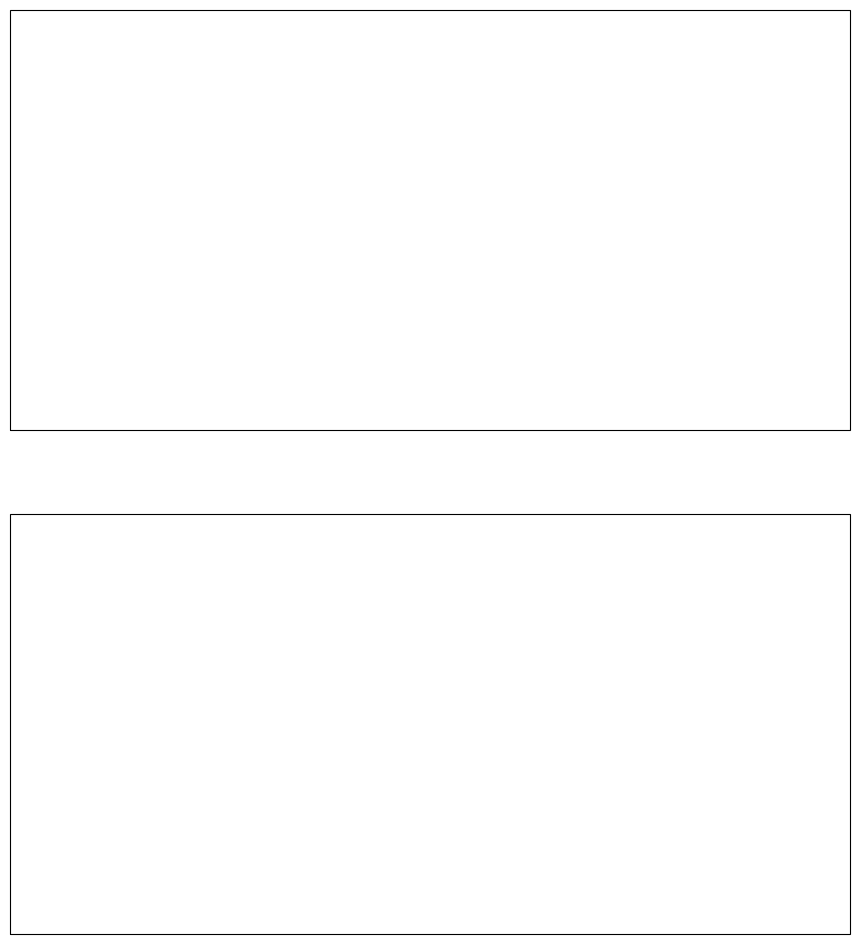

In [12]:
bigtit = 'ERA5 1950-2018'
right1='DJF'
right2='JJA'
left1 = 'V200'
color_map=BYR
cont1 = [ -15,15,3.]
cont2=cont1
fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
handle=zmap.xmap(UWmean, cont1, pro, ax=ax[0], Special_Value = 9999.,refline=None,\
                       maintitle=bigtit, lefttitle=left1,righttitle=right1,cmap=color_map,data_cent_lon=0)
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(USmean, cont2, pro, ax=ax[1], Special_Value = 9999.,refline=None,\
                        maintitle=bigtit, lefttitle=left1,righttitle=right2,cmap=color_map,data_cent_lon=0)
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
fig.subplots_adjust(wspace=0,hspace=0.2)
zmap.changebox(ax,'all',linewidth=2,color='black')
zmap.changelabel(ax,fontsize=14,fontfamily='futura',fontweight='bold')
# Add horizontal colorbar
plt.savefig('V200.pdf')
plt.show()

In [ ]:
#Plot U Surface Wind

var='u'
level='1000'

#epoch='AFT'
UW = zdat.read_era5(var,level,period='DJF',epoch=epoch,loc = homedir + dddir)
US = zdat.read_era5(var,level,period='JJA',epoch=epoch,loc = homedir + dddir)
UWmean = zcom.smooth_xarray(UW[var].mean(dim='time'),sigma=5,order=0)
USmean = zcom.smooth_xarray(US[var].mean(dim='time'),sigma=5,order=0)

In [ ]:
bigtit = 'ERA5 1950-2018'
right1='DJF'
right2='JJA'
left1 = 'U1000'
color_map=BYR
cont1 = [ -15,15,2.]
cont2=cont1
fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
handle=zmap.xmap(UWmean, cont1, pro, ax=ax[0], Special_Value = 9999.,refline=None,\
                       maintitle=bigtit, lefttitle=left1,righttitle=right1,cmap=color_map,data_cent_lon=0)
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(USmean, cont2, pro, ax=ax[1], Special_Value = 9999.,refline=None,\
                        maintitle=bigtit, lefttitle=left1,righttitle=right2,cmap=color_map,data_cent_lon=0)
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
fig.subplots_adjust(wspace=0,hspace=0.2)
zmap.changebox(ax,'all',linewidth=2,color='black')
zmap.changelabel(ax,fontsize=14,fontfamily='futura',fontweight='bold')
# Add horizontal colorbar
plt.savefig('U1000.pdf')
plt.show()

In [ ]:
#Plot V Surface Wind
var='v'
level='1000'

#epoch='AFT'
UW = zdat.read_era5(var,level,period='DJF',epoch=epoch,loc = homedir + dddir)
US = zdat.read_era5(var,level,period='JJA',epoch=epoch,loc = homedir + dddir)
# Smooth noisy surface fields
UWmean = zcom.smooth_xarray(UW[var].mean(dim='time'),sigma=5,order=0)
USmean = zcom.smooth_xarray(US[var].mean(dim='time'),sigma=5,order=0)

In [ ]:
bigtit = 'ERA5 1950-2018'
right1='DJF'
right2='JJA'
left1 = 'V1000'
color_map=BYR
cont1 = [ -15,15,2.]
cont2=cont1
fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
handle=zmap.xmap(UWmean, cont1, pro, ax=ax[0], Special_Value = 9999.,refline=None,\
                       maintitle=bigtit, lefttitle=left1,righttitle=right1,cmap=color_map,data_cent_lon=0)
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(USmean, cont2, pro, ax=ax[1], Special_Value = 9999.,refline=None,\
                        maintitle=bigtit, lefttitle=left1,righttitle=right2,cmap=color_map,data_cent_lon=0)
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
fig.subplots_adjust(wspace=0,hspace=0.2)
zmap.changebox(ax,'all',linewidth=2,color='black')
zmap.changelabel(ax,fontsize=14,fontfamily='futura',fontweight='bold')
# Add horizontal colorbar
plt.savefig('V1000.pdf')
plt.show()

In [ ]:
#Plot Mean Sea Level Pressure
var='msl'
level='msl'

#epoch='AFT'
UW = zdat.read_era5(var,level,period='DJF',epoch=epoch,loc = homedir + dddir)
US = zdat.read_era5(var,level,period='JJA',epoch=epoch,loc = homedir + dddir)
UWmean = zcom.smooth_xarray(UW[var].mean(dim='time'),sigma=5,order=0)/100 - 1000
USmean = zcom.smooth_xarray(US[var].mean(dim='time'),sigma=5,order=0)/100 - 1000

In [ ]:
bigtit = 'ERA5 1950-2018'
right1='DJF'
right2='JJA'
left1 = 'Mean Sea Level Pressure'
color_map=BYR
cont1 = [ -30,30,5]
cont2=cont1
fig,ax,pro=zmap.init_figure(2,1,'Atlantic', constrained_layout=False, figsize=(24,12))
handle=zmap.xmap(UWmean, cont1, pro, ax=ax[0], refline=None,\
                       title={'maintitle':bigtit, 'lefttitle':left1,'righttitle':right1},cmap=color_map,data_cent_lon=0)
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(USmean, cont2, pro, ax=ax[1],refline=None,
                        title={'maintitle':bigtit, 'lefttitle':left1,'righttitle':right2},cmap=color_map,data_cent_lon=0)
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
fig.subplots_adjust(wspace=0,hspace=0.2)
zmap.changebox(ax,'all',linewidth=2,color='black')
zmap.changelabel(ax,fontsize=14,fontfamily='futura',fontweight='bold')
# Add horizontal colorbar
plt.savefig('MSL.pdf')
plt.show()

In [ ]:
#PlotMean Sea Level Pressure
fontt = {'family': 'Palatino',
        'color':  'darkred',
        'weight': 'normal',
        'size': 24,
        }
fonta = {'family': 'Futura',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }
fontl = {'family': 'Futura',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }
fontts = {'family': 'Palatino',
        'color':  'darkred',
        'weight': 'bold',
        'size': 18,
        }
fig, ax = plt.subplots(figsize=(12,6),constrained_layout=True)


latx = UW.lat.data
pw = UW.msl.mean(dim=('time','lon'))/100 - 1000
ps = US.msl.mean(dim=('time','lon'))/100  - 1000

ax.set_xlim(-90, 90)
ax.set_ylim(-30,30)
#ax.set_yscale('log')
ax.grid(True,axis='both',linestyle='dashed', alpha=0.8)
ax.set_title('Mean Sea Level Pressure',fontdict=fontts,loc='right')
ax.set_title('ERA5 1950-2018',fontdict=fontts)
ax.set_ylabel('hPa', fontsize=14,fontfamily='Futura',fontweight='bold')

ax.plot(latx,pw,linewidth=3, color='goldenrod',label='Winter')
#ax.plot(latx,ed,linewidth=2,color='goldenrod',alpha=0.5)
#ax.plot(latx,ej,linewidth=2,color='darkgoldenrod',alpha=0.5,ls='dashed')
# ax.fill_between(latx,shp, facecolor='gold', alpha=0.2)
# ax.fill_between(latx,lhp, facecolor='navajowhite', alpha=0.2)
#ax.fill_between(latx,shp+lhp+lwp+swp, facecolor='forestgreen', alpha=0.2)
ax.plot(latx,ps,linewidth=3,color='forestgreen',label='Summer')

ax.legend(fontsize='large')
ax.axhline(y=0,color='gray',linestyle='dashed')
ax.axvline(x=0,color='gray',linestyle='dashed')
zmap.changelabel(ax,fontsize=14,fontfamily='Futura',fontweight='bold')
zmap.changebox(ax,'all',linewidth=2,color='black')

zmap.label_equator(ax)


plt.savefig('MSLZON'+epoch+ period+'.pdf')
plt.show()


In [ ]:
#Plot SST
var='sst'
level='sst'

#epoch='AFT'
UW = zdat.read_era5(var,level,period='DJF',epoch=epoch,loc = homedir + dddir)
US = zdat.read_era5(var,level,period='JJA',epoch=epoch,loc = homedir + dddir)
UWmean = UW[var].mean(dim='time') -273.16
USmean = US[var].mean(dim='time') -273.16

In [ ]:
bigtit = 'ERA5 1950-2018'
right1='DJF'
right2='JJA'
left1 = 'Sea Surface Temperature'
color_map=BYR
cont1 = [2,30,2 ]
cont2=cont1
fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
handle=zmap.xmap(UWmean, cont1, pro, ax=ax[0], Special_Value = 9999.,coasts=False,\
                       maintitle=bigtit, lefttitle=left1,righttitle=right1,cmap=color_map,data_cent_lon=0)
import cartopy.feature as cfeature
ax[0].add_feature(cfeature.COASTLINE)
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(USmean, cont2, pro, ax=ax[1], Special_Value = 9999.,coasts=False,\
                        maintitle=bigtit, lefttitle=left1,righttitle=right2,cmap=color_map,data_cent_lon=0)
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
ax[1].add_feature(cfeature.COASTLINE)
fig.subplots_adjust(wspace=0,hspace=0.2)
zmap.changebox(ax,'all',linewidth=2,color='black')
zmap.changelabel(ax,fontsize=14,fontfamily='futura',fontweight='bold')

# Add horizontal colorbar
plt.savefig('SST.pdf')
plt.show()

In [ ]:
#Plot SST
var='t2m'
level='t2m'

#epoch='AFT'
UW = zdat.read_era5(var,level,period='DJF',epoch=epoch,loc = homedir + dddir)
US = zdat.read_era5(var,level,period='JJA',epoch=epoch,loc = homedir + dddir)
UWmean = UW[var].mean(dim='time') -273.16
USmean = US[var].mean(dim='time') -273.16

In [ ]:
bigtit = 'ERA5 1950-2018'
right1='DJF'
right2='JJA'
left1 = '2 Meter Temperature'
color_map=BYR
cont1 = [-40,40,5 ]
cont2=cont1
fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
handle=zmap.xmap(UWmean, cont1, pro, ax=ax[0], Special_Value = 9999.,coasts=False,\
                       maintitle=bigtit, lefttitle=left1,righttitle=right1,cmap=color_map,data_cent_lon=0)
import cartopy.feature as cfeature
ax[0].add_feature(cfeature.COASTLINE)
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(USmean, cont2, pro, ax=ax[1], Special_Value = 9999.,coasts=False,\
                        maintitle=bigtit, lefttitle=left1,righttitle=right2,cmap=color_map,data_cent_lon=0)
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
ax[1].add_feature(cfeature.COASTLINE)
fig.subplots_adjust(wspace=0,hspace=0.2)
zmap.changebox(ax,'all',linewidth=2,color='black')
zmap.changelabel(ax,fontsize=14,fontfamily='futura',fontweight='bold')

# Add horizontal colorbar
plt.savefig('2T.pdf')
plt.show()

In [ ]:
#Plot Precip
UW=zdat.read_dataset(dataset='GPCP',var='precip',level='SURF',season='DJF',verbose=False)
US=zdat.read_dataset(dataset='GPCP',var='precip',level='SURF',season='JJA',verbose=False)
UWmean = UW.precip.mean(dim='time')
USmean = US.precip.mean(dim='time')

In [ ]:
bigtit = 'GPCP 1979-2018'
right1='DJF'
right2='JJA'
left1 = 'Precipitation'
color_map=zcol.make_cmap('4WMED8')
cont1 = [0,1,3,4,5,6,7,8,10,11,12,13]
cont2=cont1
fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
handle=zmap.xmap(UWmean, cont1, pro, ax=ax[0], Special_Value = 9999.,refline=None,contour=False,\
                       maintitle=bigtit, lefttitle=left1,righttitle=right1,cmap=color_map,data_cent_lon=0)
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(USmean, cont2, pro, ax=ax[1], Special_Value = 9999.,refline=None,contour=False,\
                        maintitle=bigtit, lefttitle=left1,righttitle=right2,cmap=color_map,data_cent_lon=0)
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
fig.subplots_adjust(wspace=0,hspace=0.2)
# Add horizontal colorbar
zmap.changebox(ax,'all',linewidth=2,color='black')
zmap.changelabel(ax,fontsize=14,fontfamily='futura',fontweight='bold')
plt.savefig('TPREP.pdf')
plt.show()

In [ ]:
var='z'
level='200'
period='DJF'
epoch='ALL'
U=zdat.in_data('u',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=True).mean(dim='time')
V=zdat.in_data('v',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=False).mean(dim='time')
T=zdat.in_data('t',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=False).mean(dim='time') - 273.16

period='JJA'
epoch='ALL'
Us=zdat.in_data('u',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=True).mean(dim='time')
Vs=zdat.in_data('v',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=False).mean(dim='time')
Ts=zdat.in_data('t',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=False).mean(dim='time') - 273.16

In [ ]:
u=U.u.sel(lat=slice(90,20),lon=slice(0,360))
v=V.v.sel(lat=slice(90,20),lon=slice(0,360))
t=T.t.sel(lat=slice(90,20),lon=slice(0,360))
# u=U.u
# v=V.v
# t=T.t

In [ ]:
%%time
bigtit = 'ERA5 1950-2018'
right=period
left1 = 'Wind 850'
left2 = 'Wind 850'
sel_pro = {'projection':'Satellite','centlat':45,'centlon':120,'z':3e+6}
# sel_pro = 'Pacific'
fig,ax,pro=zmap.init_figure(2,1,sel_pro, constrained_layout=False, figsize=(24,12))
handle = zmap.xstmap(u,v, 
                      color=t, pro=pro,ax=ax[0], data_cent_lon=0, \
                      ylimit=(20,90),xlimit=(-180,180),\
                      lw=1,density=1, cyclic=True,\
                      lonlabel=None,latlabel=None,\
                      title={'maintitle':bigtit, 'lefttitle':left1,'righttitle':right},\
                      colorbar=True,
                      cmap='coolwarm',norm=None)
# zmap.add_colorbar(fig, handle.lines, ax[0], colorbar_size=0.01,label_size=10,edges=True)
info = zmap.vecmap2(u, v, t, color='black', pro=pro,ax=ax[1], data_cent_lon=0, \
                      veckey=None,vec_min = 0.0, stride=10,\
                      ylimit=(20,90),xlimit=(-180,180),\
                      title={'maintitle':bigtit, 'lefttitle':left1,'righttitle':right},\
                      colorbar=True, cyclic=False,\
                      cmap='coolwarm',norm=None)
zmap.changebox(ax,'all',linewidth=2,color='black')
zmap.changelabel(ax,fontsize=14,fontfamily='futura',fontweight='bold')
#fig.subplots_adjust(wspace=0,hspace=0.2)
# Add horizontal colorbar
# plt.savefig('Wind850.pdf')
# plt.show()

In [ ]:
kaz=zmap.adjust_data_centlon(u)
kaz.assign_coords({'lon': (kaz.lon - 180)})


In [ ]:
bigtit = 'ERA5 1950-2018'
right1='DJF'
right2='JJA'
left1 = 'T200'
color_map=BYR
cont1 = [ 10]
cont2=cont1
fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
handle=zmap.xmap(T.t, cont1, pro, ax=ax[0],refline=None,\
                      title={'maintitle':bigtit, 'lefttitle':left1,'righttitle':right1},\
                      cmap=color_map,data_cent_lon=0)
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(Ts.t, cont2, pro, ax=ax[1],refline=None,\
                        title={'maintitle':bigtit, 'lefttitle':left1,'righttitle':right2},\
                      cmap=color_map,data_cent_lon=0)
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
fig.subplots_adjust(wspace=0,hspace=0.2)
zmap.changebox(ax,'all',linewidth=2,color='black')
zmap.changelabel(ax,fontsize=14,fontfamily='futura',fontweight='bold')
# Add horizontal colorbar
plt.savefig('U1000.pdf')
plt.show()

In [ ]:

level='1000'
period='DJF'
epoch='ALL'
U=zdat.in_data('u',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=True).mean(dim='time')
V=zdat.in_data('v',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=False).mean(dim='time')
T=zdat.in_data('t',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=False).mean(dim='time') - 273.16
SP=T.assign(speed=lambda x: np.sqrt(U.u**2+V.v**2))
period='JJA'
epoch='ALL'
Us=zdat.in_data('u',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=True).mean(dim='time')
Vs=zdat.in_data('v',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=False).mean(dim='time')
# Ts=zdat.in_data('t',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=False).mean(dim='time') - 273.16
SPs=Ts.assign(speed=lambda x: np.sqrt(Us.u**2+Vs.v**2))

In [ ]:
reds=zcol.make_cmap('red-1')
#Example Two Plots
bigtit = 'ERA5 1950-2018'
right=period
left1 = 'Wind 1000'
left2 = 'Wind 1000'
fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
handle = zmap.xstmap(U.u, V.v,  color=SP.speed, proj=pro,ax=ax[0], data_cent_lon=0, \
                      lw=1,density=2, Special_Value = 9999.,\
                      lefttitle=left1,righttitle='DJF',maintitle=bigtit,\
                      dxtick=30,dytick=30,\
                      colorbar=True,
                      cmap=reds,norm=None)
#zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1 = zmap.xstmap(Us.u, Vs.v,  color=SPs.speed, proj=pro,ax=ax[1], data_cent_lon=0, \
                      lw=1,density=2, Special_Value = 9999.,\
                      lefttitle=left1,righttitle='JJA',maintitle=bigtit,\
                      dxtick=30,dytick=30,\
                      colorbar=True,
                      cmap=reds,norm=None)
zmap.changebox(ax,'all',linewidth=2,color='black')
zmap.changelabel(ax,fontsize=14,fontfamily='futura',fontweight='bold')
#fig.subplots_adjust(wspace=0,hspace=0.2)
# Add horizontal colorbar
plt.savefig('Wind1000.pdf')
plt.show()


In [ ]:
var='z'
level='200'
period='DJF'
epoch='ALL'
U=zdat.in_data('u',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=True).mean(dim='time')
V=zdat.in_data('v',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=False).mean(dim='time')
T=zdat.in_data('t',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=False).mean(dim='time') - 273.16
SP=T.assign(speed=lambda x: np.sqrt(U.u**2+V.v**2))

period='JJA'
epoch='ALL'
Us=zdat.in_data('u',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=True).mean(dim='time')
Vs=zdat.in_data('v',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=False).mean(dim='time')
Ts=zdat.in_data('t',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=False).mean(dim='time') - 273.16

# Ts=zdat.in_data('t',level,period=period,epoch=epoch, loc = homedir+dddir,averaging=True,verbose=False).mean(dim='time') - 273.16
SPs=Ts.assign(speed=lambda x: np.sqrt(Us.u**2+Vs.v**2))

In [ ]:
reds=zcol.make_cmap('red-1')
#Example Two Plots
bigtit = 'ERA5 1950-2018'
right=period
left1 = 'Wind 200'
left2 = 'Wind 200'
fig,ax,pro=zmap.init_figure(1,1,'NHStereoAmerica', constrained_layout=False, figsize=(12,24))
# fig,ax,pro=zmap.init_figure(1,1,'Pacific', constrained_layout=False, figsize=(12,24))

handle = zmap.xstmap_stereo(U.u, V.v, color=SP.speed, proj=pro,ax=ax, data_cent_lon=0, \
                      lw=2,density=2, Special_Value = 9999.,\
                      lefttitle=left1,righttitle='DJF',maintitle=bigtit,\
                      dxtick=30,dytick=30,\
                      colorbar=True, xlimit=[-180,180.],ylimit=[20,90],
                      cmap=reds,norm=None)
plt.savefig('Wind200.pdf')
plt.show()


In [6]:
dd

<xarray.Dataset>
Dimensions:  (time: 69, lat: 721, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1951-01-01 1952-01-01 ... 2019-01-01
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
Data variables:
    z        (time, lat, lon) float32 1.066e+05 1.066e+05 ... 1.094e+05
Attributes:
    Conventions:  CF-1.6
    history:      2021-02-12 14:55:36 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [7]:
ZZ= dd.z

In [8]:
ZZ

<xarray.DataArray 'z' (time: 69, lat: 721, lon: 1440)>
array([[[106593.625, 106593.625, ..., 106593.625, 106593.625],
        [106599.77 , 106599.77 , ..., 106599.54 , 106599.77 ],
        ...,
        [108853.12 , 108853.12 , ..., 108853.47 , 108853.47 ],
        [108848.836, 108848.836, ..., 108848.836, 108848.836]],

       [[107710.805, 107710.805, ..., 107710.805, 107710.805],
        [107697.586, 107697.48 , ..., 107697.71 , 107697.586],
        ...,
        [109496.   , 109496.   , ..., 109496.   , 109496.   ],
        [109503.88 , 109503.88 , ..., 109503.88 , 109503.88 ]],

       ...,

       [[108326.35 , 108326.35 , ..., 108326.35 , 108326.35 ],
        [108315.44 , 108315.44 , ..., 108315.21 , 108315.21 ],
        ...,
        [108952.664, 108952.664, ..., 108952.78 , 108952.78 ],
        [108957.78 , 108957.78 , ..., 108957.78 , 108957.78 ]],

       [[107170.805, 107170.805, ..., 107170.805, 107170.805],
        [107178.414, 107178.414, ..., 107178.53 , 107178.53 ],
        ...,
        [109447.81 , 109447.93 , ..., 109447.81 , 109447.81 ],
        [109438.6  , 109438.6  , ..., 109438.6  , 109438.6  ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1951-01-01 1952-01-01 ... 2019-01-01
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential

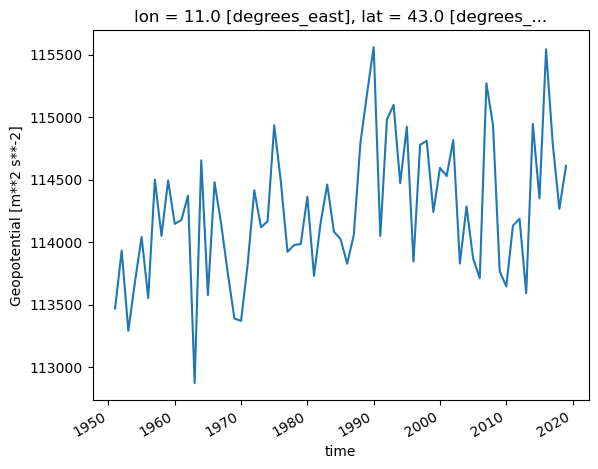

In [13]:
ZZ.sel(lat=43,lon=11).plot()

In [17]:
zz=ZZ.sel(lat=slice(40,30),lon=slice(0,50))

In [18]:
zz

<xarray.DataArray 'z' (time: 69, lat: 41, lon: 201)>
array([[[114359.94 , 114344.53 , ..., 114159.24 , 114145.805],
        [114416.375, 114404.56 , ..., 114219.73 , 114206.98 ],
        ...,
        [117001.71 , 116996.5  , ..., 117322.   , 117314.12 ],
        [117075.98 , 117071.12 , ..., 117416.54 , 117408.9  ]],

       [[115120.1  , 115092.164, ..., 114236.414, 114237.23 ],
        [115142.586, 115120.336, ..., 114299.914, 114301.31 ],
        ...,
        [117083.055, 117085.96 , ..., 117388.04 , 117384.445],
        [117155.48 , 117158.6  , ..., 117486.65 , 117482.59 ]],

       ...,

       [[115311.63 , 115292.07 , ..., 114997.91 , 114991.31 ],
        [115345.164, 115327.77 , ..., 115063.836, 115057.46 ],
        ...,
        [117167.16 , 117170.56 , ..., 117932.6  , 117927.48 ],
        [117233.414, 117237.06 , ..., 118013.19 , 118007.96 ]],

       [[116342.375, 116313.73 , ..., 114409.664, 114410.81 ],
        [116366.47 , 116340.336, ..., 114474.34 , 114476.27 ],
        ...,
        [117691.73 , 117673.555, ..., 118057.98 , 118057.52 ],
        [117743.23 , 117725.5  , ..., 118169.375, 118168.805]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1951-01-01 1952-01-01 ... 2019-01-01
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 49.0 49.25 49.5 49.75 50.0
  * lat      (lat) float32 40.0 39.75 39.5 39.25 39.0 ... 30.75 30.5 30.25 30.0
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential